# <u><b><h1>Systeme de Recommandation<h1></b></u>

### importation packages 

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import re

import warnings
warnings.filterwarnings("ignore")

In [23]:
plt.rcParams['font.size'] = 13
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.figsize'] = (16,10)
sns.set_style("dark")

In [24]:
data = pd.read_csv('top_1000_IMDb_movies.csv')
data_temp = data.copy()

In [25]:
data.head(10)

,Unnamed: 0,id,name,year,run_time,genre,rating,about,director,actors,votes,gross
0,0,1,Oppenheimer,I) (,180 min,"Biography, Drama, History",8.4,"story of American scientist, J. Robert Oppenhe...",Christopher Nolan,"Cillian Murphy, Emily Blunt, Matt Damon, Rober...",547233,NaN
1,1,2,Indiana Jones and the Dial of Destiny,2023,154 min,"Action, Adventure, Sci-Fi",6.6,aeologist Indiana Jones races against time to ...,James Mangold,"Harrison Ford, Phoebe Waller-Bridge, Antonio B...",152583,NaN
2,2,3,Home Alone,1990,103 min,"Comedy, Family",7.7,"ight-year-old troublemaker, mistakenly left ho...",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",626006,$285.76M
3,3,4,Love Actually,2003,135 min,"Comedy, Drama, Romance",7.6,ows the lives of eight very different couples ...,Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",514724,$59.70M
4,4,5,Elf,2003,97 min,"Adventure, Comedy, Family",7.1,"ed as an oversized elf, Buddy travels from the...",Jon Favreau,"Will Ferrell, James Caan, Bob Newhart, Zooey D...",298236,$173.40M
5,5,6,How the Grinch Stole Christmas,2000,104 min,"Comedy, Family, Fantasy",6.3,"he outskirts of Whoville lives a green, reveng...",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tambor",278778,$260.04M
6,6,7,Barbie,I) (,114 min,"Adventure, Comedy, Fantasy",7.0,ie suffers a crisis that leads her to question...,Greta Gerwig,"Margot Robbie, Ryan Gosling, Issa Rae, Kate Mc...",404570,NaN
7,7,8,The Super Mario Bros. Movie,2023,92 min,"Animation, Adventure, Comedy",7.1,umber named Mario travels through an undergrou...,"Aaron Horvath, Michael Jelenic, Pierre Leduc, ...","Chris Pratt, Anya Taylor-Joy, Charlie Day, Jac...",210874,NaN
8,8,9,Five Nights at Freddy's,2023,109 min,"Horror, Mystery, Thriller",5.5,oubled security guard begins working at Freddy...,Emma Tammi,"Josh Hutcherson, Piper Rubio, Elizabeth Lail, ...",77053,NaN
9,9,10,The Grinch,2018,85 min,"Animation, Comedy, Family",6.4,umpy Grinch plots to ruin Christmas for the vi...,"Yarrow Cheney, Scott Mosier","Benedict Cumberbatch, Cameron Seely, Rashida J...",83964,$270.62M


### Analyze the Data

In [26]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [27]:
data.columns

Index(['id', 'name', 'year', 'run_time', 'genre', 'rating', 'about',
       'director', 'actors', 'votes', 'gross'],
      dtype='object')

In [28]:
data.nunique()

id          1000
name         988
year          59
run_time     107
genre        156
rating        53
about        999
director     531
actors       982
votes        999
gross        939
dtype: int64

In [29]:
data.shape

(1000, 11)

In [30]:
data[data['name'].duplicated(keep="last")]

,id,name,year,run_time,genre,rating,about,director,actors,votes,gross
31,32,Godzilla,2014,123 min,"Action, Adventure, Sci-Fi",6.4,world is beset by the appearance of monstrous ...,Gareth Edwards,"Aaron Taylor-Johnson, Elizabeth Olsen, Bryan C...",431886,$200.68M
73,74,The Little Mermaid,I) (,135 min,"Adventure, Family, Fantasy",7.2,ung mermaid makes a deal with a sea witch to t...,Rob Marshall,"Halle Bailey, Jonah Hauer-King, Melissa McCart...",146175,NaN
136,137,The Mummy,2017,111 min,"Action, Adventure, Fantasy",5.4,ncient Egyptian princess is awakened from her ...,Alex Kurtzman,"Tom Cruise, Sofia Boutella, Annabelle Wallis, ...",202647,$80.10M
169,170,The Lion King,1994,88 min,"Animation, Adventure, Drama",8.5,prince Simba and his father are targeted by h...,"Roger Allers, Rob Minkoff","Matthew Broderick, Jeremy Irons, James Earl Jo...",1118595,$422.78M
202,203,Total Recall,1990,113 min,"Action, Adventure, Sci-Fi",7.5,a man goes in to have virtual vacation memori...,Paul Verhoeven,"Arnold Schwarzenegger, Sharon Stone, Michael I...",348347,$119.39M
212,213,Ghostbusters,1984,105 min,"Action, Comedy, Fantasy",7.8,e parapsychologists forced out of their univer...,Ivan Reitman,"Bill Murray, Dan Aykroyd, Sigourney Weaver, Ha...",437417,$238.63M
214,215,Beauty and the Beast,I) (,129 min,"Adventure, Family, Fantasy",7.1,lfish Prince is cursed to become a monster for...,Bill Condon,"Emma Watson, Dan Stevens, Luke Evans, Josh Gad",328558,$504.01M
328,329,Aladdin,2019,128 min,"Adventure, Comedy, Family",6.9,nd-hearted street urchin and a power-hungry Gr...,Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ...",284772,$355.56M
388,389,Hercules,1997,93 min,"Animation, Adventure, Comedy",7.3,son of Zeus and Hera is stripped of his immort...,"Ron Clements, John Musker","Tate Donovan, Susan Egan, James Woods, Barbara...",249500,$99.05M
438,439,The Addams Family,1991,99 min,"Comedy, Fantasy",6.9,artists plan to fleece an eccentric family usi...,Barry Sonnenfeld,"Anjelica Huston, Raul Julia, Christopher Lloyd...",176915,$113.50M


In [31]:
data[data['name'].duplicated(keep="first")]

,id,name,year,run_time,genre,rating,about,director,actors,votes,gross
144,145,Godzilla,I) (,139 min,"Action, Sci-Fi, Thriller",5.4,ch nuclear tests irradiate an iguana into a gi...,Roland Emmerich,"Matthew Broderick, Jean Reno, Maria Pitillo, H...",200550,$136.31M
170,171,The Mummy,1999,124 min,"Action, Adventure, Fantasy",7.1,n archaeological dig in the ancient city of Ha...,Stephen Sommers,"Brendan Fraser, Rachel Weisz, John Hannah, Arn...",452867,$155.25M
299,300,The Lion King,2019,118 min,"Animation, Adventure, Drama",6.8,"r the murder of his father, a young lion princ...",Jon Favreau,"Donald Glover, Beyoncé, Seth Rogen, Chiwetel E...",262022,$543.64M
472,473,Beauty and the Beast,1991,84 min,"Animation, Family, Fantasy",8.0,ince cursed to spend his days as a hideous mon...,"Gary Trousdale, Kirk Wise","Paige O'Hara, Robby Benson, Jesse Corti, Rex E...",473683,$218.97M
507,508,Aladdin,1992,90 min,"Animation, Adventure, Comedy",8.0,nd-hearted street urchin and a power-hungry Gr...,"Ron Clements, John Musker","Scott Weinger, Robin Williams, Linda Larkin, J...",455175,$217.35M
602,603,The Little Mermaid,1989,83 min,"Animation, Adventure, Family",7.6,rmaid princess makes a Faustian bargain in an ...,"Ron Clements, John Musker","Jodi Benson, Samuel E. Wright, Rene Auberjonoi...",285931,$111.54M
643,644,Teenage Mutant Ninja Turtles,2014,101 min,"Action, Adventure, Comedy",5.8,"a kingpin threatens New York City, a group of...",Jonathan Liebesman,"Megan Fox, Will Arnett, William Fichtner, Noel...",218141,$191.20M
657,658,Ghostbusters,2016,117 min,"Action, Comedy, Fantasy",6.8,"owing a ghost invasion of Manhattan, paranorma...",Paul Feig,"Melissa McCarthy, Kristen Wiig, Kate McKinnon,...",241611,$128.34M
692,693,Total Recall,I) (,118 min,"Action, Adventure, Sci-Fi",6.2,"ctory worker, Douglas Quaid, begins to suspect...",Len Wiseman,"Colin Farrell, Bokeem Woodbine, Bryan Cranston...",263723,$58.88M
709,710,The Jungle Book,1967,78 min,"Animation, Adventure, Comedy",7.6,eera the Panther and Baloo the Bear have a dif...,Wolfgang Reitherman,"Phil Harris, Sebastian Cabot, Louis Prima, Bru...",195173,$141.84M


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1000 non-null   int64  
 1   name      1000 non-null   object 
 2   year      1000 non-null   object 
 3   run_time  1000 non-null   object 
 4   genre     1000 non-null   object 
 5   rating    1000 non-null   float64
 6   about     1000 non-null   object 
 7   director  1000 non-null   object 
 8   actors    1000 non-null   object 
 9   votes     1000 non-null   int64  
 10  gross     956 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 86.1+ KB


Text(0.5, 1.0, 'Empty Data')

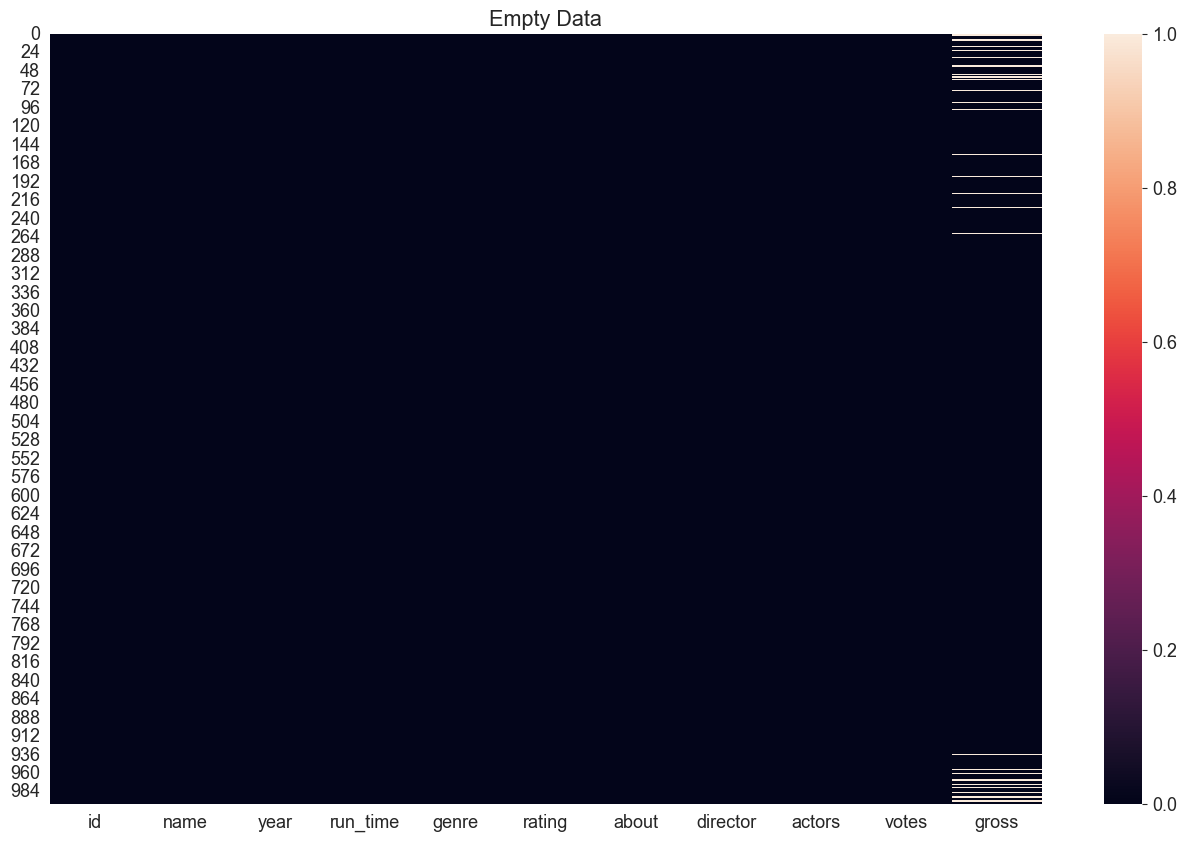

In [33]:
sns.heatmap(data.isnull())
plt.title("Empty Data")

In [34]:
data['year'].dtype

dtype('O')

In [35]:
data['year'].iloc[1]

'2023'

In [36]:
type(data['year'].iloc[1])

str

In [37]:
data['year'].iloc[1][0]

'2'

### Data Analytics

In [38]:
# Filter Year column

#### Top 10 Movies

In [44]:
data[data['rating'] == data['rating'].max()]

,id,name,year,run_time,genre,rating,about,director,actors,votes,gross
27,28,The Godfather,1972,175 min,"Crime, Drama",9.2,"Vito Corleone, head of a mafia family, decides...",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1972590,$134.97M


In [45]:
top10Movies = data.nlargest(10,'rating')

In [46]:
top10Movies

,id,name,year,run_time,genre,rating,about,director,actors,votes,gross
27,28,The Godfather,1972,175 min,"Crime, Drama",9.2,"Vito Corleone, head of a mafia family, decides...",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1972590,$134.97M
34,35,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,the menace known as the Joker wreaks havoc an...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2811521,$534.86M
77,78,Schindler's List,1993,195 min,"Biography, Drama, History",9.0,"erman-occupied Poland during World War II, ind...",Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro...",1422109,$96.90M
96,97,The Lord of the Rings: The Return of the King,2003,201 min,"Action, Adventure, Drama",9.0,alf and Aragorn lead the World of Men against ...,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",1937891,$377.85M
41,42,Pulp Fiction,1994,154 min,"Crime, Drama",8.9,"lives of two mob hitmen, a boxer, a gangster a...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",2170015,$107.93M
38,39,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,"Action, Adventure, Drama",8.8,ek Hobbit from the Shire and eight companions ...,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",1964709,$315.54M
43,44,Inception,2010,148 min,"Action, Adventure, Sci-Fi",8.8,ief who steals corporate secrets through the u...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2495794,$292.58M
82,83,Forrest Gump,1994,142 min,"Drama, Romance",8.8,history of the United States from the 1950s to...,Robert Zemeckis,"Tom Hanks, Robin Wright, Gary Sinise, Sally Field",2205344,$330.25M
194,195,The Lord of the Rings: The Two Towers,2002,179 min,"Action, Adventure, Drama",8.8,e Frodo and Sam edge closer to Mordor with the...,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",1747250,$342.55M
15,16,Spider-Man: Across the Spider-Verse,2023,140 min,"Animation, Action, Adventure",8.7,"s Morales catapults across the multiverse, whe...","Joaquim Dos Santos, Kemp Powers, Justin K. Tho...","Shameik Moore, Hailee Steinfeld, Brian Tyree H...",311730,NaN


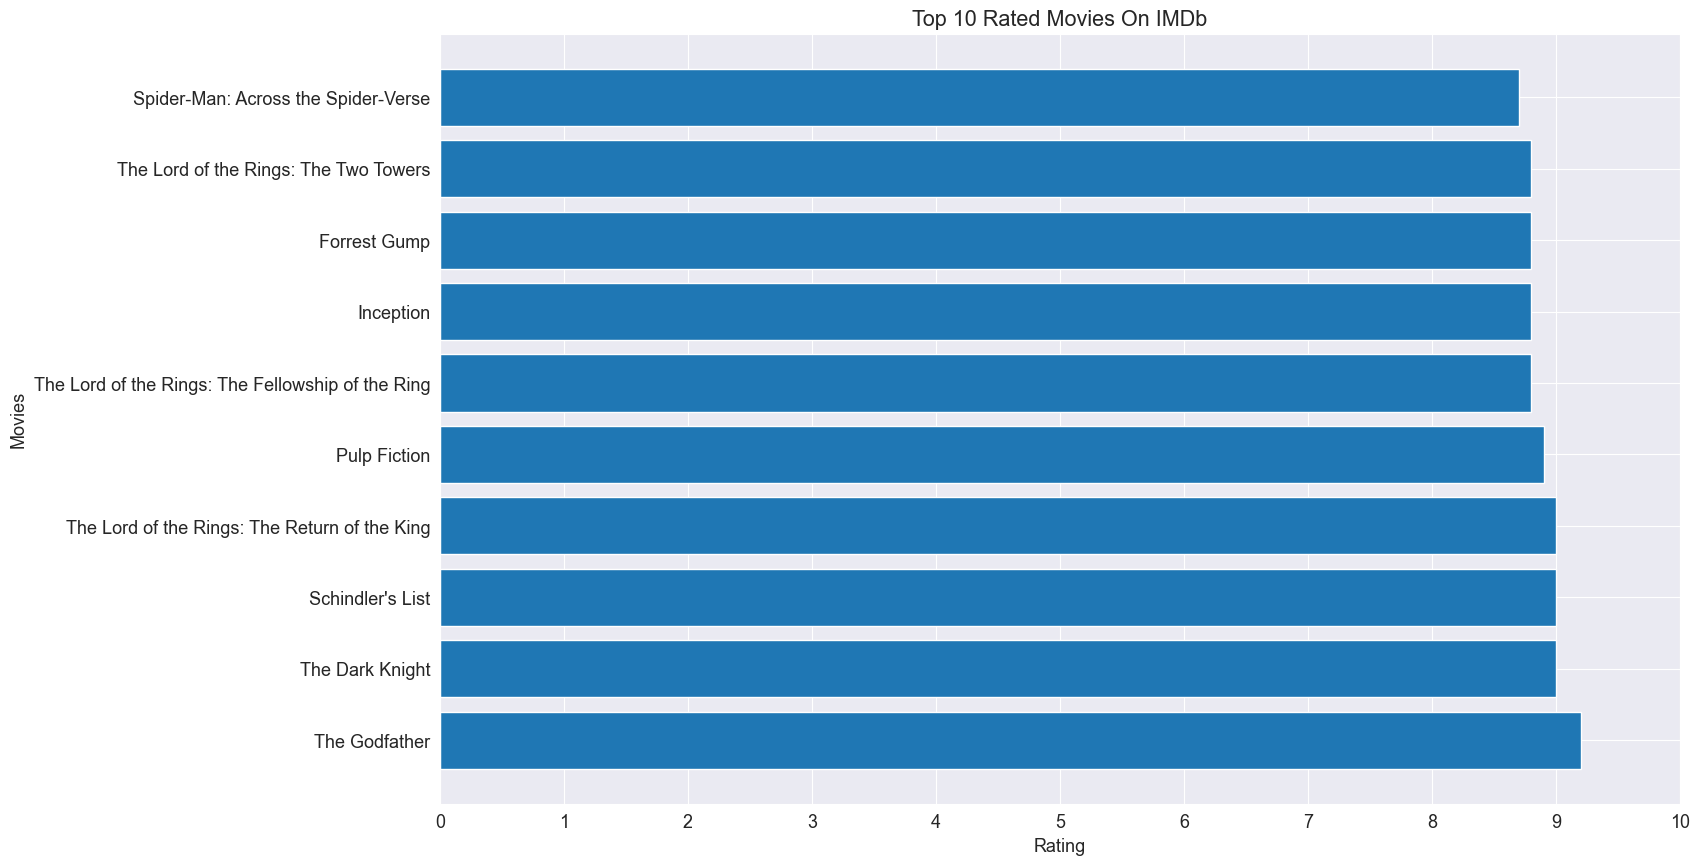

In [47]:
plt.barh(top10Movies['name'],top10Movies['rating'])
plt.title("Top 10 Rated Movies On IMDb")
plt.xticks(range(11))
plt.xlabel("Rating")
plt.ylabel("Movies")
plt.grid("on")

#### Year

Text(0.5, 0, 'Year')

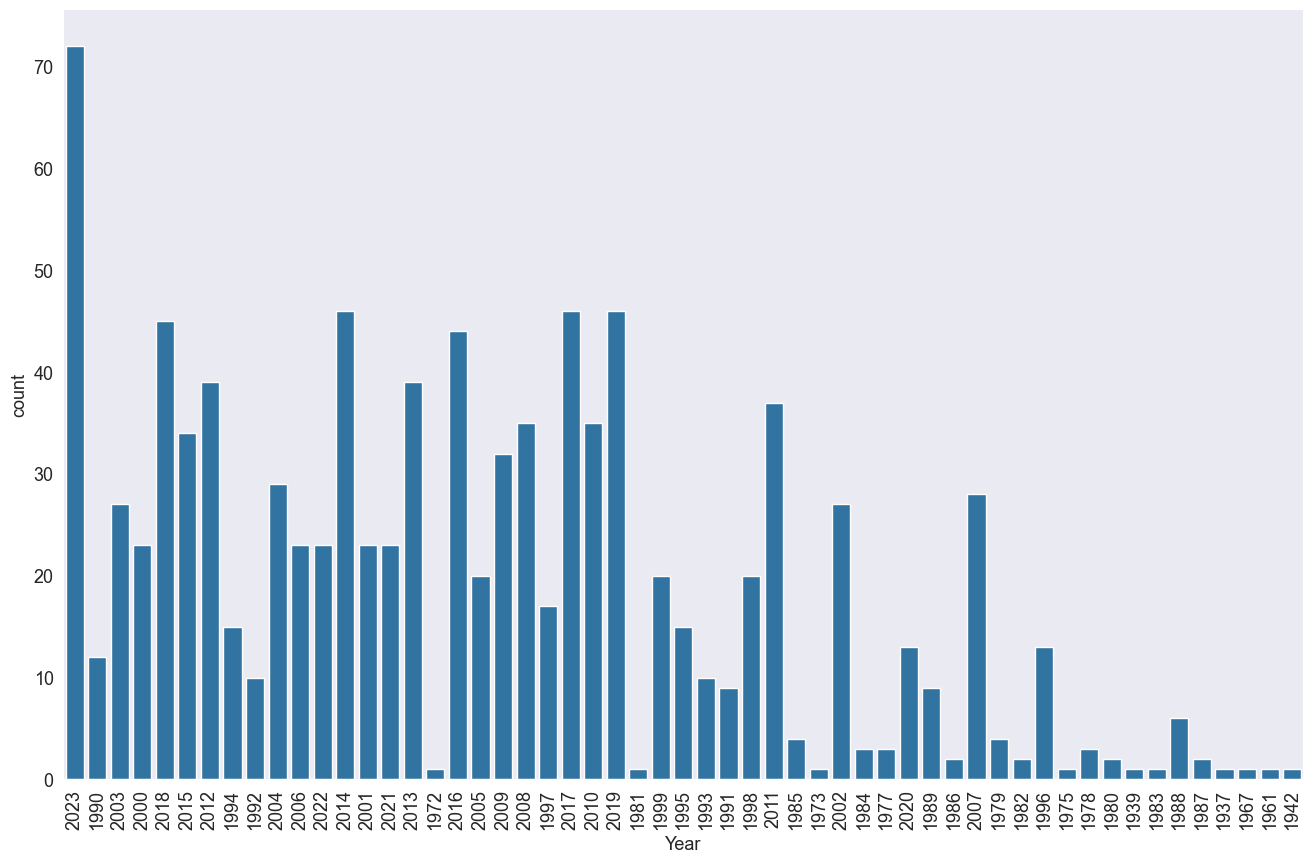

In [71]:
sns.countplot(data=data,x='year')
plt.xticks(rotation=90)
plt.xlabel("Year")

## Recommendation System

### Cosine similarity 

In [76]:
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(data["about"])

cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
index_sim = pd.Series(data.index, index=data['name']).drop_duplicates()

In [77]:
tfidf_matrix.shape

(1000, 5749)

In [78]:
cosine_sim.shape

(1000, 1000)

In [79]:
def get_recommendations(title):
    
    idx = index_sim[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return list(data['name'].iloc[movie_indices].values)

In [80]:
data['name'].unique()

array(['Oppenheimer', 'Indiana Jones and the Dial of Destiny',
       'Home Alone', 'Love Actually', 'Elf',
       'How the Grinch Stole Christmas', 'Barbie',
       'The Super Mario Bros. Movie', "Five Nights at Freddy's",
       'The Grinch', 'Mad Max: Fury Road', 'The Hunger Games',
       'The Santa Clause', 'Home Alone 2: Lost in New York',
       'The Polar Express', 'Spider-Man: Across the Spider-Verse',
       'Mission: Impossible - Dead Reckoning Part One', 'The Holiday',
       'The Batman', 'Interstellar',
       "Harry Potter and the Sorcerer's Stone", 'The Equalizer 3',
       'Godzilla vs. Kong', 'John Wick: Chapter 4', 'Dune: Part One',
       'Gladiator', 'The Wolf of Wall Street', 'The Godfather',
       'The Hunger Games: Catching Fire', 'Suicide Squad',
       'Sound of Freedom', 'Godzilla',
       'Charlie and the Chocolate Factory', 'A Christmas Carol',
       'The Dark Knight', 'Prometheus', 'Titanic', 'Watchmen',
       'The Lord of the Rings: The Fellowship of t

In [82]:
get_recommendations('Oppenheimer')

['Hidden Figures',
 'Green Book',
 'Die Another Day',
 'Speed',
 'The Bridges of Madison County',
 'The Blind Side',
 'Angry Birds',
 'The Incredible Hulk',
 'The Bourne Legacy',
 'Captain America: The Winter Soldier']

### jacard similarity

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['about'])

# Convertir la matrice TF-IDF en une matrice dense
dense_tfidf_matrix = tfidf_matrix.toarray()

# la similarité de Jaccard
jaccard_sim = 1 - pairwise_distances(dense_tfidf_matrix, metric="jaccard")

index_sim = pd.Series(data.index, index=data['name']).drop_duplicates()

def get_recommendations_jaccard(title):
    idx = index_sim[title]
    sim_scores = list(enumerate(jaccard_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return list(data['name'].iloc[movie_indices].values)

# Obtenir des recommandations
recommendations_jaccard = get_recommendations_jaccard('Oppenheimer')
print(recommendations_jaccard)


['Hidden Figures', 'The Blind Side', 'Captain Phillips', 'Bambi', 'The Curious Case of Benjamin Button', 'Minions: The Rise of Gru', 'Interview with the Vampire: The Vampire Chronicles', 'The Incredible Hulk', 'Hollow Man', 'Rocketman']


## Recommandation based on analyse sentiment of my movies 

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('top_1000_IMDb_movies.csv')
sentiment_data = pd.read_csv('imdb_movies_sentiments_svm_with_predictions.csv')

tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(data["about"])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
index_sim = pd.Series(data.index, index=data['name']).drop_duplicates()

def get_recommendations(title):
    idx = index_sim[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return list(data['name'].iloc[movie_indices].values)

def analyze_sentiments_and_recommend_with_percentage(title, positive_threshold, negative_threshold):
    recommended_movies = get_recommendations(title)
    positive_recommendations = []
    for movie in recommended_movies:
        # Vérifier si le film est dans le dataset des sentiments
        if movie in sentiment_data['Film'].values:
            sentiment = sentiment_data.loc[sentiment_data['Film'] == movie, 'Predicted_Sentiment'].values[0]
            # si film a des positives sentiments on recommande
            if sentiment == 'positif':
                positive_recommendations.append(movie)
        else:
            # Sinon (s'il n'existe pas dans ma dataset)
            positive_recommendations.append(movie)

    return positive_recommendations
title_to_recommend = 'Elf'
positive_recommendations = analyze_sentiments_and_recommend_with_percentage(title_to_recommend, positive_threshold=80, negative_threshold=15)

print(f"Vous pourriez aimer : {positive_recommendations}")


Vous pourriez aimer : ['The Polar Express', 'Rango', 'Crocodile Dundee', 'Annabelle Comes Home', 'Gangs of New York', 'The Conjuring 2', 'Penguins of Madagascar', 'Big Daddy', "Daddy's Home", 'Madagascar: Escape 2 Africa']
